In [5]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39587 sha256=658f2596bcffdafe66facd9e79c6c7f2a9dd5eb6369167b5a684b619b7e89a82
  Stored in directory: /Users/shuuwakawa/Library/Caches/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


In [1]:
import torch
import cv2
import numpy as np
from torchvision import models, transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
model.eval()

# Define target layers (usually the last conv layer)
target_layers = [model.layer4]


/Users/shuuwakawa/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shuuwakawa/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:

IMG_PATH = '/Users/shuuwakawa/Downloads/ODIR-5K/TrainingImages/1_left.jpg'
rgb_img = cv2.imread(IMG_PATH, 1)[:, :, ::-1]  # Load image and convert BGR to RGB
rgb_img = np.float32(rgb_img) / 255  # Normalize the image

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(rgb_img).unsqueeze(0)  # Add batch dimension

with GradCAM(model=model, target_layers=target_layers) as cam:
    
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)

    
    grayscale_cam = grayscale_cam[0, :]  
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)


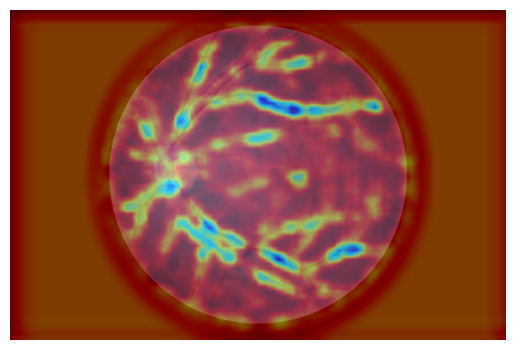

In [13]:

import matplotlib.pyplot as plt


resized_cam_image_rgb = cv2.cvtColor(resized_cam_image, cv2.COLOR_BGR2RGB)


plt.imshow(resized_cam_image_rgb)
plt.axis('off')  # Hide axis
plt.show()


## Cataract Images

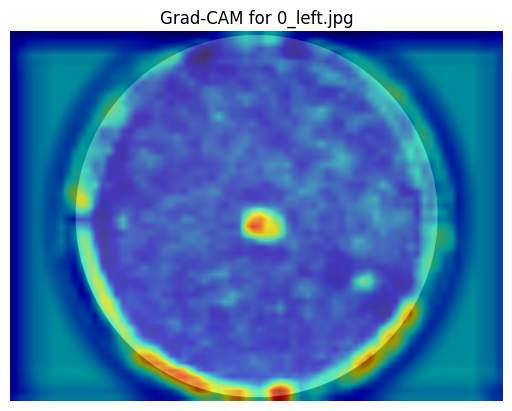

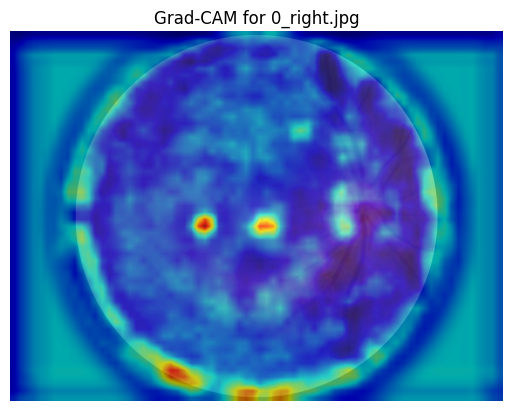

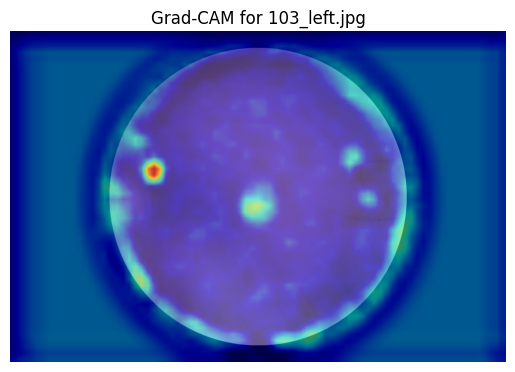

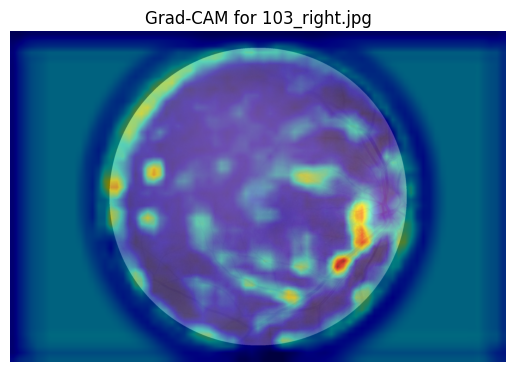

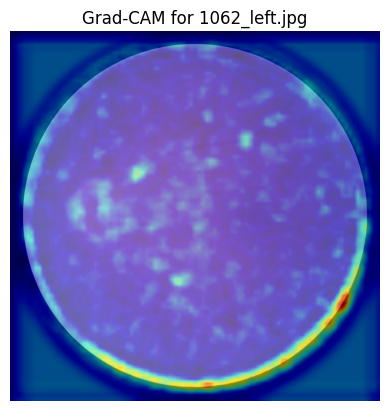

In [2]:
import os
import cv2
import numpy as np
import torch
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import matplotlib.pyplot as plt

IMG_DIR = '/Users/shuuwakawa/Downloads/ODIR-5K/organized_dataset/train/cataract'


image_paths = [os.path.join(IMG_DIR, fname) for fname in sorted(os.listdir(IMG_DIR))[:5]]


preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


target_layers = [model.layer4]  


for img_path in image_paths:
    # Load image and convert to RGB
    rgb_img = cv2.imread(img_path, 1)[:, :, ::-1]
    rgb_img = np.float32(rgb_img) / 255  # Normalize the image

    # Preprocess the image for the model
    input_tensor = preprocess(rgb_img).unsqueeze(0)  # Add batch dimension

    # Generate Grad-CAM using the target layer
    with GradCAM(model=model, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=None)

        # Convert grayscale CAM to heatmap and overlay on the image
        grayscale_cam = grayscale_cam[0, :]  # Remove batch dimension
        cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # Display the Grad-CAM
        plt.figure()
        plt.imshow(cam_image)
        plt.title(f'Grad-CAM for {os.path.basename(img_path)}')
        plt.axis('off')  # Hide axis
        plt.show()


## Non-Cataract Image

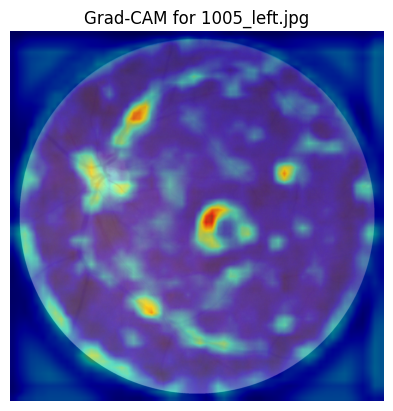

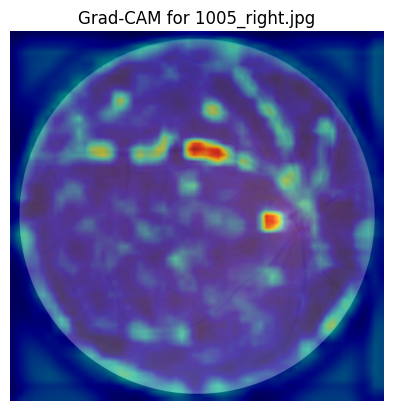

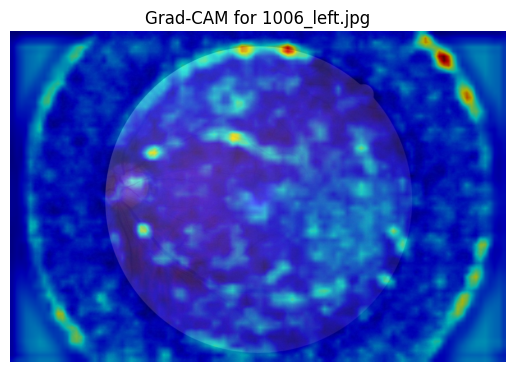

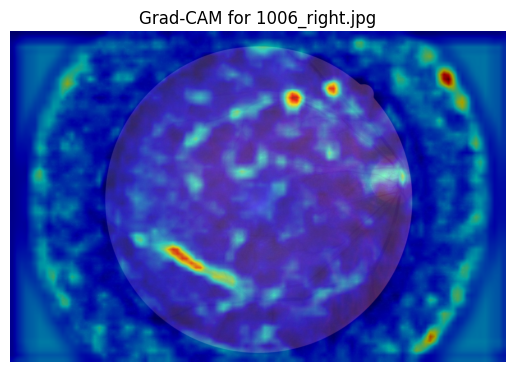

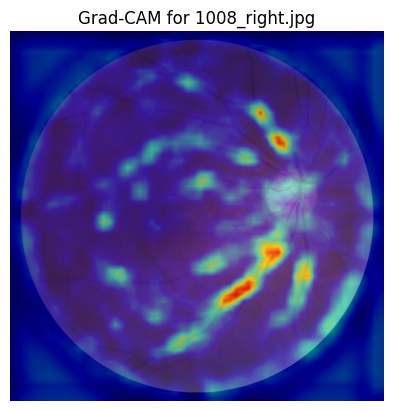

In [3]:
import os
import cv2
import numpy as np
import torch
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import matplotlib.pyplot as plt

# Path to the images folder
IMG_DIR = '/Users/shuuwakawa/Downloads/ODIR-5K/organized_dataset/train/non_cataract'

# Load the first 5 images from the directory
image_paths = [os.path.join(IMG_DIR, fname) for fname in sorted(os.listdir(IMG_DIR))[:5]]

# Preprocessing function for images
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Target layers (replace with the appropriate layer from your model)
target_layers = [model.layer4]  # For ResNet, or replace with the right layer for your model

# Loop over the first 5 images and generate Grad-CAM
for img_path in image_paths:
    # Load image and convert to RGB
    rgb_img = cv2.imread(img_path, 1)[:, :, ::-1]
    rgb_img = np.float32(rgb_img) / 255  # Normalize the image

    # Preprocess the image for the model
    input_tensor = preprocess(rgb_img).unsqueeze(0)  # Add batch dimension

    # Generate Grad-CAM using the target layer
    with GradCAM(model=model, target_layers=target_layers) as cam:
        grayscale_cam = cam(input_tensor=input_tensor, targets=None)

        # Convert grayscale CAM to heatmap and overlay on the image
        grayscale_cam = grayscale_cam[0, :]  # Remove batch dimension
        cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # Display the Grad-CAM
        plt.figure()
        plt.imshow(cam_image)
        plt.title(f'Grad-CAM for {os.path.basename(img_path)}')
        plt.axis('off')  # Hide axis
        plt.show()


## Organize data 

In [1]:
# !pip install openpyxl


In [21]:
# import os
# import shutil
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the Excel data
# data_df = pd.read_excel("/Users/shuuwakawa/Downloads/ODIR-5K/data.xlsx", sheet_name='Sheet1')

# # Rename columns
# data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", 
#                    "right_diagnosys", "normal", "diabetes", "glaucoma", "cataract", 
#                    "amd", "hypertension", "myopia", "other"]

# # Directory containing images
# IMG_DIR = '/Users/shuuwakawa/Downloads/ODIR-5K/TrainingImages/'

# # Define where to save the organized dataset
# output_dir = '/Users/shuuwakawa/Downloads/ODIR-5K/organized_dataset/'

# # Create folders for the new organized dataset
# def create_dir_structure(output_dir):
#     for split in ['train', 'val']:
#         for category in ['cataract', 'non_cataract']:
#             os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# create_dir_structure(output_dir)

# # Define a function to determine if an image has a cataract based on the diagnosis
# def has_cataract(row):
#     return row['cataract'] == 1

# # Collect all image paths with labels
# image_paths = []
# labels = []

# for index, row in data_df.iterrows():
#     # Check if left or right eye has cataract
#     for side in ['left', 'right']:
#         fundus_col = f'{side}_fundus'
#         image_name = f"{row['id']}_{side}.jpg"  # Image name format
#         image_path = os.path.join(IMG_DIR, image_name)
        
#         if os.path.exists(image_path):
#             image_paths.append(image_path)
#             if has_cataract(row):
#                 labels.append('cataract')
#             else:
#                 labels.append('non_cataract')

# # Split into train and validation sets
# train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# # Function to move images to the respective train/val folders
# def move_images(image_paths, labels, split, output_dir):
#     for image_path, label in zip(image_paths, labels):
#         if label not in ['cataract', 'non_cataract']:
#             continue  # Skip invalid labels
        
#         # Destination folder (train or val) and category (cataract or non_cataract)
#         dest_dir = os.path.join(output_dir, split, label)
        
#         # Move image to the appropriate folder
#         shutil.copy(image_path, dest_dir)

# # Move the images to train/val folders
# move_images(train_paths, train_labels, 'train', output_dir)
# move_images(val_paths, val_labels, 'val', output_dir)

# print("Images have been organized into the directory structure.")


Images have been organized into the directory structure.


## Fine Tune Res-net-50 model with cataract & non-cataract data